# **FACE DETECTION WITH CNN**
**HỌ VÀ TÊN:** Nguyễn Trọng Đại

**MSSV:** 19146146

**LỚP:** AI-CLC-ST4

**GITHUB / KAGGLE**

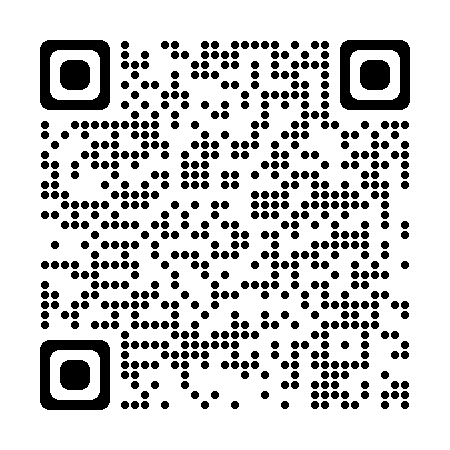
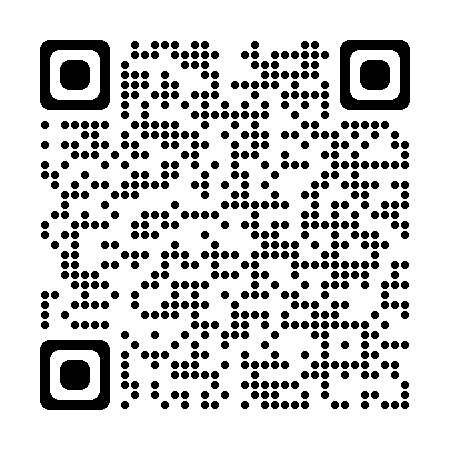

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
def loadData():
    file = open('/content/drive/MyDrive/Colab Notebooks/CNN/fruit_recognition/dataset/fruit.data', 'rb')
    (images, labels) = pickle.load(file)
    # close the file
    file.close()
    print(images.shape)
    print(labels.shape)
    return images, labels

In [16]:
X,y = loadData()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(4509, 256, 256, 3)
(4509, 10)


In [17]:
print(f"KÍCH THƯỚC DỮ LIỆU TRAIN {X_train.shape} - LABEL: {y_train.shape}")

KÍCH THƯỚC DỮ LIỆU TRAIN (3607, 256, 256, 3) - LABEL: (3607, 10)


In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256,256,3)))
model.add(layers.Conv2D(128, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))

model.add(layers.Conv2D(64, (3,3), padding="same", activation='relu', kernel_initializer='he_uniform'))
model.add(layers.MaxPool2D((2,2), strides=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10))
model.add(layers.Softmax())

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Training
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_test, y_test), verbose=1)
model.save("model.h5")

Epoch 1/20
113/113 [==============================] - 19s 160ms/step - loss: 349.7241 - accuracy: 0.3779 - val_loss: 1.1180 - val_accuracy: 0.7273
Epoch 2/20
113/113 [==============================] - 18s 158ms/step - loss: 1.0667 - accuracy: 0.6784 - val_loss: 0.6348 - val_accuracy: 0.8149
Epoch 3/20
113/113 [==============================] - 18s 159ms/step - loss: 0.7954 - accuracy: 0.7710 - val_loss: 0.4339 - val_accuracy: 0.8825
Epoch 4/20
113/113 [==============================] - 18s 158ms/step - loss: 1.3877 - accuracy: 0.5559 - val_loss: 0.8339 - val_accuracy: 0.7273
Epoch 5/20
113/113 [==============================] - 18s 158ms/step - loss: 0.8532 - accuracy: 0.7510 - val_loss: 0.4428 - val_accuracy: 0.8792
Epoch 6/20
113/113 [==============================] - 18s 159ms/step - loss: 0.6980 - accuracy: 0.8062 - val_loss: 0.3294 - val_accuracy: 0.9013
Epoch 7/20
113/113 [==============================] - 18s 161ms/step - loss: 0.4130 - accuracy: 0.8791 - val_loss: 0.2179 - val_

In [21]:
score = model.evaluate(X_test, y_test, verbose=2)
print("Loss = ", score[0])
print("Accuracy = ", score[1])

29/29 - 2s - loss: 0.1618 - accuracy: 0.9734 - 2s/epoch - 55ms/step
Loss =  0.16178597509860992
Accuracy =  0.9733924865722656


In [22]:
modelH5 = tf.keras.models.load_model("model.h5")

In [23]:
labels = ['Bắp', 'Bơ', 'Cam', 'Chuối', 'Đào', 'Dưa hấu', 'Kiwi', 'Táo', 'Thanh long', 'Thơm']

In [24]:
def detect(imgURL):
    img = load_img(imgURL, target_size=(256,256))
    plt.imshow(img)
    img = img_to_array(img)
    img = img.reshape(1,256,256,3)
    img = img.astype('float32')
    img = img / 255.0
    print(labels[np.argmax(modelH5.predict(img), axis=1)[0]])

Thanh long


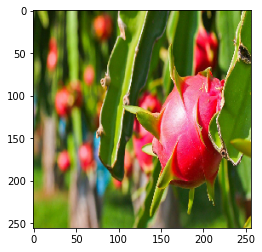

In [25]:
detect("/content/thanhlong_test.jpg")

Dưa hấu


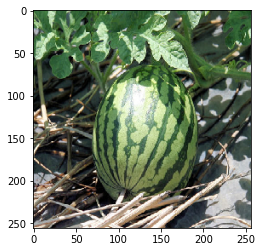

In [29]:
detect("/content/dua_hau_test.jpg")

Thanh long


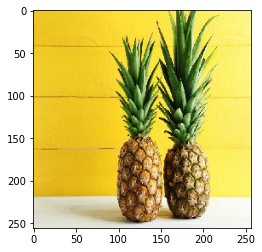

In [28]:
detect("/content/thom_2.jpg")